C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.4.1.post1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.4.1.post1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator AdaBoostRegressor from 

Applying PCA dimensionality reduction
Applying UMAP dimensionality reduction
Applying Isomap dimensionality reduction
Applying LLE dimensionality reduction
Applying Autoencoders dimensionality reduction
Applying ICA dimensionality reduction


C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\decomposition\_fastica.py:

Applying Kernel PCA dimensionality reduction
Applying Random Projection dimensionality reduction


<Figure size 1000x600 with 0 Axes>

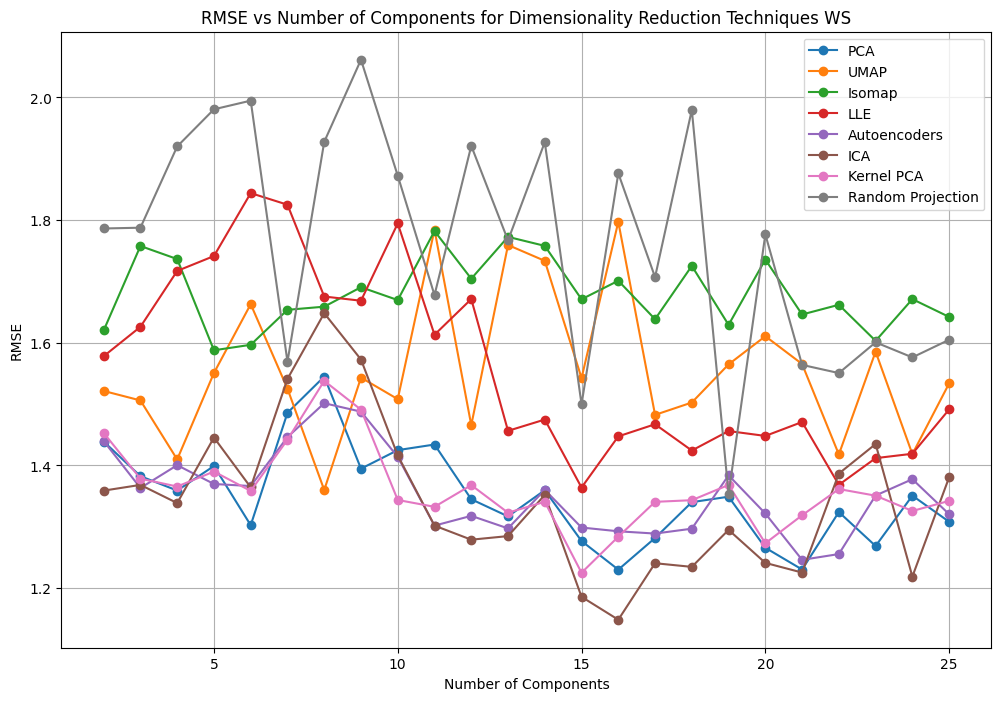

In [1]:
import pandas as pd
import joblib
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD, FastICA, KernelPCA
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding
from sklearn.random_projection import GaussianRandomProjection
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, ElasticNet, SGDRegressor, BayesianRidge, LinearRegression, RANSACRegressor, TheilSenRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import umap
import numpy as np
import os
import ast

# Define the data columns and results columns
data_columns = [
    'OF2', 'OF3', 'OF4', 'OF5', 'OF6', 'OF7', 'OF8', 'OF9', 'OF10', 'OF11', 'OF13', 'OF14', 'OF15', 'OF16', 'OF17',
    'OF18', 'OF19', 'OF20', 'OF21', 'OF22', 'OF23', 'OF24', 'OF25', 'OF26', 'OF27', 'OF28', 'OF30', 'OF31',
    'OF33', 'OF34', 'OF37', 'OF38', 'F1', 'F2', 'F3_a', 'F3_b', 'F3_c', 'F3_d', 'F3_e', 'F3_f', 'F3_g', 'F4', 'F5', 'F6',
    'F7', 'F8', 'F9', 'F10', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'F23',
    'F24', 'F25', 'F28', 'F29', 'F30', 'F31', 'F32', 'F33', 'F34', 'F35', 'F36', 'F37', 'F38', 'F39', 'F40',
    'F41', 'F43', 'F44', 'F45', 'F46', 'F47', 'F48', 'F49', 'F50', 'F51', 'F52', 'F53', 'F54', 'F55', 'F56', 'F57',
    'F58', 'F59', 'F62', 'F63', 'F64', 'F65', 'F67', 'F68', 'S1', 'S2', 'S4', 'S5'
]

results_columns = ['WS']

# Implement dimensionality reduction techniques
dimensionality_reduction_techniques = {
    "PCA": PCA(n_components=10),
    "UMAP": umap.UMAP(n_components=10),
    "Isomap": Isomap(n_components=10),
    "LLE": LocallyLinearEmbedding(n_components=10),
    "Autoencoders": TruncatedSVD(n_components=10),  # Assuming TruncatedSVD as a simple autoencoder
    "ICA": FastICA(n_components=10),
    "Kernel PCA": KernelPCA(n_components=10),
    "Random Projection": GaussianRandomProjection(n_components=10)  # Assuming GaussianRandomProjection
}

# Define a mapping from model names to model classes
model_mapping = {
    'Ridge': Ridge,
    'DecisionTreeRegressor': DecisionTreeRegressor,
    'GradientBoostingRegressor': GradientBoostingRegressor,
    'RandomForestRegressor': RandomForestRegressor,
    'AdaBoostRegressor': AdaBoostRegressor,
    'KNeighborsRegressor': KNeighborsRegressor,
    'MLPRegressor': MLPRegressor,
    'ElasticNet': ElasticNet,
    'SGDRegressor': SGDRegressor,
    'SVR': SVR,
    'BayesianRidge': BayesianRidge,
    'KernelRidge': KernelRidge,
    'LinearRegression': LinearRegression,
    'RANSACRegressor': RANSACRegressor,
    'TheilSenRegressor': TheilSenRegressor
}

# Function to load, evaluate and retrain the model with dimensionality reduction
def load_evaluate_and_retrain_model(csv_file, model_name, model_path, hyperparameters):
    data = pd.read_csv(csv_file)
    X = data[data_columns]
    y = data[results_columns[0]]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Load the original model and calculate RMSE
    if model_name == 'TensorFlow':
        model = tf.keras.models.load_model(model_path)
        y_pred = model.predict(X_test_scaled)
    else:
        model = joblib.load(model_path)
        y_pred = model.predict(X_test_scaled)

    rmse_original = mean_squared_error(y_test, y_pred, squared=False)
    reduction_results = {'Original': rmse_original}

    # Iterate over a range of component values for each dimensionality reduction technique
    for name, reducer in dimensionality_reduction_techniques.items():
        print(f"Applying {name} dimensionality reduction")
        rmse_values = []
    
        for n_components in range(2, 26):  # Range from 2 to 25 components
            # Create a pipeline that includes scaling and dimensionality reduction
            if name == "t-SNE":
                # t-SNE requires special handling as it does not support transform
                X_concatenated = np.concatenate((X_train_scaled, X_test_scaled), axis=0)
                if n_components<=4:
                    reducer=TSNE(n_components=4)
                else:
                    reducer=TSNE(n_components=n_components)
                X_reduced = reducer.fit_transform(X_concatenated)
                X_train_reduced = X_reduced[:len(X_train_scaled)]
                X_test_reduced = X_reduced[len(X_train_scaled):]
            else:
                # Set the number of components for the reducer
                reducer.set_params(n_components=n_components)
                pipeline = Pipeline([
                    ('scaler', StandardScaler()),
                    ('reducer', reducer)
                ])
                X_train_reduced = pipeline.fit_transform(X_train)
                X_test_reduced = pipeline.transform(X_test)
    
            # Retrain the model with the reduced data
            if model_name == 'TensorFlow':
                model = tf.keras.Sequential([
                    tf.keras.layers.InputLayer(input_shape=(X_train_reduced.shape[1],)),
                    tf.keras.layers.Dense(hyperparameters['units'], activation=hyperparameters['activation']),
                    tf.keras.layers.Dense(1)
                ])
                model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hyperparameters['learning_rate']),
                              loss='mse')
                model.fit(X_train_reduced, y_train, epochs=hyperparameters['epochs'], verbose=0)
                y_pred = model.predict(X_test_reduced)
            else:
                # Dynamically select the model class based on the model name
                model_class = model_mapping.get(model_name)
                if not model_class:
                    print(f"Unknown model name: {model_name}")
                    continue
                
                # Filter hyperparameters for the selected model
                model_hyperparameters = {k.split('__', 1)[1]: v for k, v in hyperparameters.items() if k.startswith(model_name.lower())}
                model = model_class(**model_hyperparameters)
                model.fit(X_train_reduced, y_train)
                y_pred = model.predict(X_test_reduced)
    
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            rmse_values.append(rmse)
    
        reduction_results[name] = rmse_values

    return reduction_results
model_directory = "WS"
import matplotlib.pyplot as plt

# Load the best models information
best_models_df = pd.read_csv("best_modelsWS_info.csv")

# Find the row corresponding to the model with the lowest RMSE
best_model_row = best_models_df.loc[best_models_df['rmse'].idxmin()]

# Extract information about the best model
csv_file = os.path.join('./model_all_data', best_model_row['csv_file'])
model_name = best_model_row['model_name']
model_path = os.path.join(model_directory, f"{best_model_row['csv_file']}_{model_name}_model.pkl" if model_name != 'TensorFlow' else f"{best_model_row['csv_file']}_TensorFlow_model.h5")
hyperparameters = ast.literal_eval(best_model_row['hyperparameters'])

# Initialize figure
plt.figure(figsize=(10, 6))

# Evaluate the best model with dimensionality reduction
reduction_results = load_evaluate_and_retrain_model(csv_file, model_name, model_path, hyperparameters)



plt.figure(figsize=(12, 8))
# Plot RMSE values for each reduction method
for name, rmse_values in reduction_results.items():
    if name != 'Original':  # Skip 'Original' since it doesn't have varying components
        plt.plot(range(2, 26), rmse_values, label=name,marker='o',)

# Add labels and legend
plt.xlabel('Number of Components')
plt.ylabel('RMSE')
plt.title('RMSE vs Number of Components for Dimensionality Reduction Techniques '+ model_directory)
plt.legend()
plt.grid(True)
plt.savefig("dimensionality_reduction_rmse_plot_"+model_directory+"_best.png")
# Show plot
plt.show()


C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.4.1.post1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.4.1.post1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator AdaBoostRegressor from 

Applying PCA dimensionality reduction
Applying UMAP dimensionality reduction
Applying Isomap dimensionality reduction
Applying LLE dimensionality reduction
Applying Autoencoders dimensionality reduction
Applying ICA dimensionality reduction


C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\decomposition\_fastica.py:

Applying Kernel PCA dimensionality reduction
Applying Random Projection dimensionality reduction


<Figure size 1000x600 with 0 Axes>

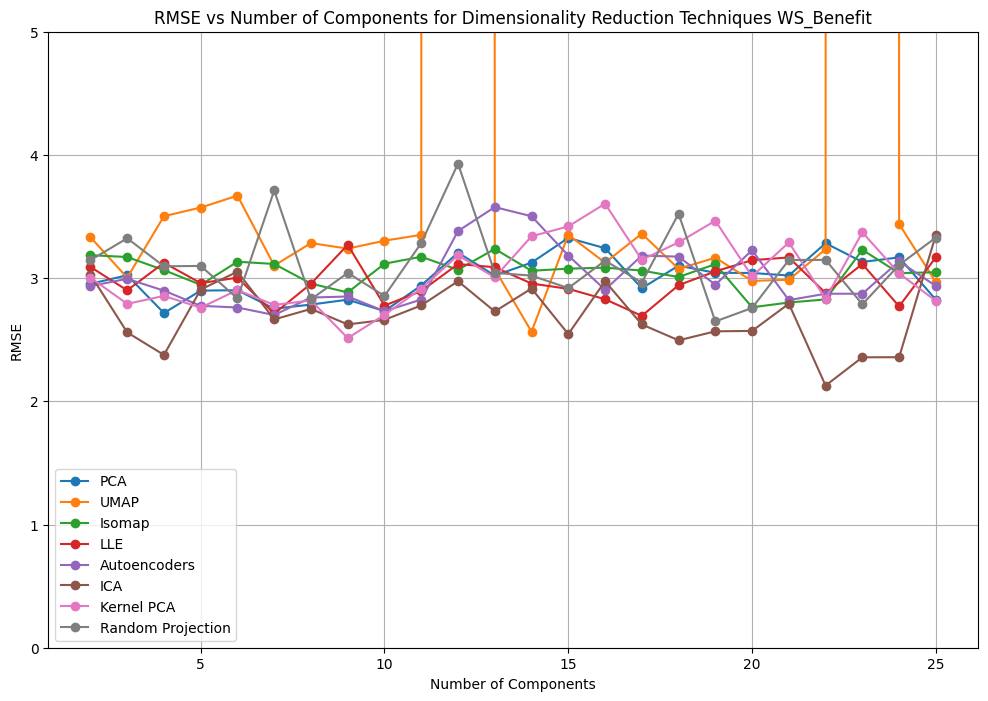

In [12]:
import pandas as pd
import joblib
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD, FastICA, KernelPCA
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding
from sklearn.random_projection import GaussianRandomProjection
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, ElasticNet, SGDRegressor, BayesianRidge, LinearRegression, RANSACRegressor, TheilSenRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import umap
import numpy as np
import os
import ast

# Define the data columns and results columns
data_columns = [
    'OF2', 'OF3', 'OF4', 'OF5', 'OF6', 'OF7', 'OF8', 'OF9', 'OF10', 'OF11', 'OF13', 'OF14', 'OF15', 'OF16', 'OF17',
    'OF18', 'OF19', 'OF20', 'OF21', 'OF22', 'OF23', 'OF24', 'OF25', 'OF26', 'OF27', 'OF28', 'OF30', 'OF31',
    'OF33', 'OF34', 'OF37', 'OF38', 'F1', 'F2', 'F3_a', 'F3_b', 'F3_c', 'F3_d', 'F3_e', 'F3_f', 'F3_g', 'F4', 'F5', 'F6',
    'F7', 'F8', 'F9', 'F10', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'F23',
    'F24', 'F25', 'F28', 'F29', 'F30', 'F31', 'F32', 'F33', 'F34', 'F35', 'F36', 'F37', 'F38', 'F39', 'F40',
    'F41', 'F43', 'F44', 'F45', 'F46', 'F47', 'F48', 'F49', 'F50', 'F51', 'F52', 'F53', 'F54', 'F55', 'F56', 'F57',
    'F58', 'F59', 'F62', 'F63', 'F64', 'F65', 'F67', 'F68', 'S1', 'S2', 'S4', 'S5'
]

results_columns = ['WS_Benefit']

# Implement dimensionality reduction techniques
dimensionality_reduction_techniques = {
    "PCA": PCA(n_components=10),
    "UMAP": umap.UMAP(n_components=10),
    "Isomap": Isomap(n_components=10),
    "LLE": LocallyLinearEmbedding(n_components=10),
    "Autoencoders": TruncatedSVD(n_components=10),  # Assuming TruncatedSVD as a simple autoencoder
    "ICA": FastICA(n_components=10),
    "Kernel PCA": KernelPCA(n_components=10),
    "Random Projection": GaussianRandomProjection(n_components=10)  # Assuming GaussianRandomProjection
}

# Define a mapping from model names to model classes
model_mapping = {
    'Ridge': Ridge,
    'DecisionTreeRegressor': DecisionTreeRegressor,
    'GradientBoostingRegressor': GradientBoostingRegressor,
    'RandomForestRegressor': RandomForestRegressor,
    'AdaBoostRegressor': AdaBoostRegressor,
    'KNeighborsRegressor': KNeighborsRegressor,
    'MLPRegressor': MLPRegressor,
    'ElasticNet': ElasticNet,
    'SGDRegressor': SGDRegressor,
    'SVR': SVR,
    'BayesianRidge': BayesianRidge,
    'KernelRidge': KernelRidge,
    'LinearRegression': LinearRegression,
    'RANSACRegressor': RANSACRegressor,
    'TheilSenRegressor': TheilSenRegressor
}

# Function to load, evaluate and retrain the model with dimensionality reduction
def load_evaluate_and_retrain_model(csv_file, model_name, model_path, hyperparameters):
    data = pd.read_csv(csv_file)
    X = data[data_columns]
    y = data[results_columns[0]]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Load the original model and calculate RMSE
    if model_name == 'TensorFlow':
        model = tf.keras.models.load_model(model_path)
        y_pred = model.predict(X_test_scaled)
    else:
        model = joblib.load(model_path)
        y_pred = model.predict(X_test_scaled)

    rmse_original = mean_squared_error(y_test, y_pred, squared=False)
    reduction_results = {'Original': rmse_original}

    # Iterate over a range of component values for each dimensionality reduction technique
    for name, reducer in dimensionality_reduction_techniques.items():
        print(f"Applying {name} dimensionality reduction")
        rmse_values = []
    
        for n_components in range(2, 26):  # Range from 2 to 25 components
            # Create a pipeline that includes scaling and dimensionality reduction
            if name == "t-SNE":
                # t-SNE requires special handling as it does not support transform
                X_concatenated = np.concatenate((X_train_scaled, X_test_scaled), axis=0)
                if n_components<=4:
                    reducer=TSNE(n_components=4)
                else:
                    reducer=TSNE(n_components=n_components)
                X_reduced = reducer.fit_transform(X_concatenated)
                X_train_reduced = X_reduced[:len(X_train_scaled)]
                X_test_reduced = X_reduced[len(X_train_scaled):]
            else:
                # Set the number of components for the reducer
                reducer.set_params(n_components=n_components)
                pipeline = Pipeline([
                    ('scaler', StandardScaler()),
                    ('reducer', reducer)
                ])
                X_train_reduced = pipeline.fit_transform(X_train)
                X_test_reduced = pipeline.transform(X_test)
    
            # Retrain the model with the reduced data
            if model_name == 'TensorFlow':
                model = tf.keras.Sequential([
                    tf.keras.layers.InputLayer(input_shape=(X_train_reduced.shape[1],)),
                    tf.keras.layers.Dense(hyperparameters['units'], activation=hyperparameters['activation']),
                    tf.keras.layers.Dense(1)
                ])
                model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hyperparameters['learning_rate']),
                              loss='mse')
                model.fit(X_train_reduced, y_train, epochs=hyperparameters['epochs'], verbose=0)
                y_pred = model.predict(X_test_reduced)
            else:
                # Dynamically select the model class based on the model name
                model_class = model_mapping.get(model_name)
                if not model_class:
                    print(f"Unknown model name: {model_name}")
                    continue
                
                # Filter hyperparameters for the selected model
                model_hyperparameters = {k.split('__', 1)[1]: v for k, v in hyperparameters.items() if k.startswith(model_name.lower())}
                model = model_class(**model_hyperparameters)
                model.fit(X_train_reduced, y_train)
                y_pred = model.predict(X_test_reduced)
    
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            rmse_values.append(rmse)
    
        reduction_results[name] = rmse_values

    return reduction_results
model_directory = "WS_Benefit"
import matplotlib.pyplot as plt

# Load the best models information
best_models_df = pd.read_csv("best_modelsWS_Benefit_info.csv")

# Find the row corresponding to the model with the lowest RMSE
best_model_row = best_models_df.loc[best_models_df['rmse'].idxmin()]

# Extract information about the best model
csv_file = os.path.join('./model_all_data', best_model_row['csv_file'])
model_name = best_model_row['model_name']
model_path = os.path.join(model_directory, f"{best_model_row['csv_file']}_{model_name}_model.pkl" if model_name != 'TensorFlow' else f"{best_model_row['csv_file']}_TensorFlow_model.h5")
hyperparameters = ast.literal_eval(best_model_row['hyperparameters'])

# Initialize figure
plt.figure(figsize=(10, 6))

# Evaluate the best model with dimensionality reduction
reduction_results = load_evaluate_and_retrain_model(csv_file, model_name, model_path, hyperparameters)



plt.figure(figsize=(12, 8))
# Plot RMSE values for each reduction method
for name, rmse_values in reduction_results.items():
    if name != 'Original':  # Skip 'Original' since it doesn't have varying components
        plt.plot(range(2, 26), rmse_values, label=name,marker='o',)

# Add labels and legend
plt.xlabel('Number of Components')
plt.ylabel('RMSE')
plt.title('RMSE vs Number of Components for Dimensionality Reduction Techniques '+ model_directory)
plt.legend()
plt.grid(True)
plt.ylim(0, 5)
plt.savefig("dimensionality_reduction_rmse_plot_"+model_directory+"_best.png")
# Show plot
plt.show()


C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.4.1.post1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.4.1.post1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator AdaBoostRegressor from 

Applying PCA dimensionality reduction
Applying UMAP dimensionality reduction
Applying Isomap dimensionality reduction
Applying LLE dimensionality reduction
Applying Autoencoders dimensionality reduction
Applying ICA dimensionality reduction


C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\decomposition\_fastica.py:

Applying Kernel PCA dimensionality reduction
Applying Random Projection dimensionality reduction


<Figure size 1000x600 with 0 Axes>

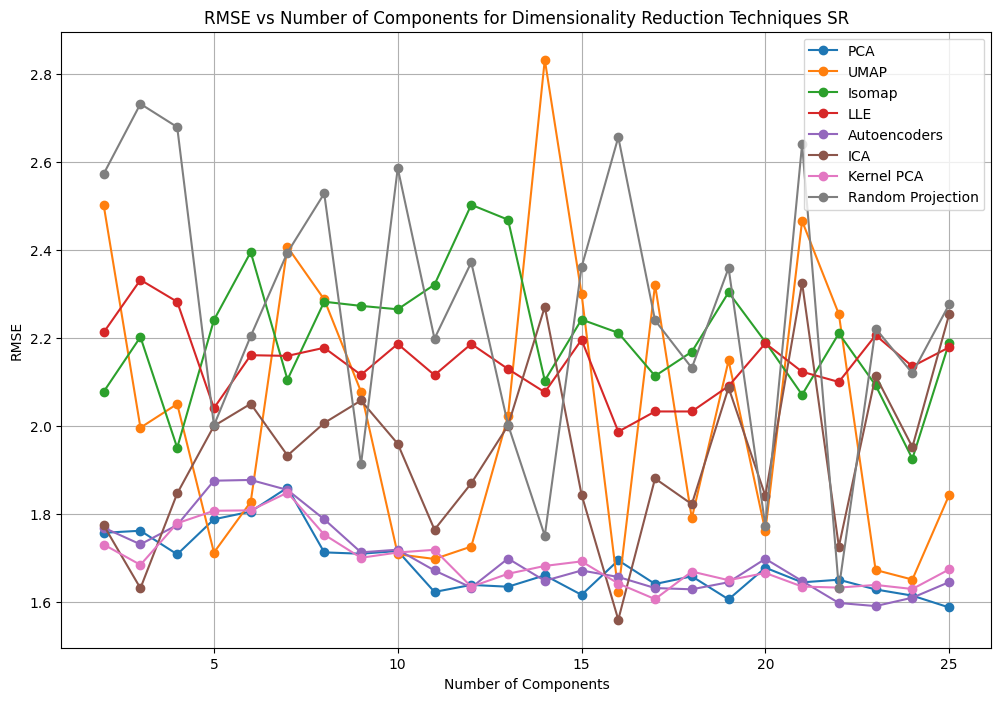

In [3]:
import pandas as pd
import joblib
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD, FastICA, KernelPCA
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding
from sklearn.random_projection import GaussianRandomProjection
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, ElasticNet, SGDRegressor, BayesianRidge, LinearRegression, RANSACRegressor, TheilSenRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import umap
import numpy as np
import os
import ast

# Define the data columns and results columns
data_columns = [
    'OF2', 'OF3', 'OF4', 'OF5', 'OF6', 'OF7', 'OF8', 'OF9', 'OF10', 'OF11', 'OF13', 'OF14', 'OF15', 'OF16', 'OF17',
    'OF18', 'OF19', 'OF20', 'OF21', 'OF22', 'OF23', 'OF24', 'OF25', 'OF26', 'OF27', 'OF28', 'OF30', 'OF31',
    'OF33', 'OF34', 'OF37', 'OF38', 'F1', 'F2', 'F3_a', 'F3_b', 'F3_c', 'F3_d', 'F3_e', 'F3_f', 'F3_g', 'F4', 'F5', 'F6',
    'F7', 'F8', 'F9', 'F10', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'F23',
    'F24', 'F25', 'F28', 'F29', 'F30', 'F31', 'F32', 'F33', 'F34', 'F35', 'F36', 'F37', 'F38', 'F39', 'F40',
    'F41', 'F43', 'F44', 'F45', 'F46', 'F47', 'F48', 'F49', 'F50', 'F51', 'F52', 'F53', 'F54', 'F55', 'F56', 'F57',
    'F58', 'F59', 'F62', 'F63', 'F64', 'F65', 'F67', 'F68', 'S1', 'S2', 'S4', 'S5'
]

results_columns = ['SR']

# Implement dimensionality reduction techniques
dimensionality_reduction_techniques = {
    "PCA": PCA(n_components=10),
    "UMAP": umap.UMAP(n_components=10),
    "Isomap": Isomap(n_components=10),
    "LLE": LocallyLinearEmbedding(n_components=10),
    "Autoencoders": TruncatedSVD(n_components=10),  # Assuming TruncatedSVD as a simple autoencoder
    "ICA": FastICA(n_components=10),
    "Kernel PCA": KernelPCA(n_components=10),
    "Random Projection": GaussianRandomProjection(n_components=10)  # Assuming GaussianRandomProjection
}

# Define a mapping from model names to model classes
model_mapping = {
    'Ridge': Ridge,
    'DecisionTreeRegressor': DecisionTreeRegressor,
    'GradientBoostingRegressor': GradientBoostingRegressor,
    'RandomForestRegressor': RandomForestRegressor,
    'AdaBoostRegressor': AdaBoostRegressor,
    'KNeighborsRegressor': KNeighborsRegressor,
    'MLPRegressor': MLPRegressor,
    'ElasticNet': ElasticNet,
    'SGDRegressor': SGDRegressor,
    'SVR': SVR,
    'BayesianRidge': BayesianRidge,
    'KernelRidge': KernelRidge,
    'LinearRegression': LinearRegression,
    'RANSACRegressor': RANSACRegressor,
    'TheilSenRegressor': TheilSenRegressor
}

# Function to load, evaluate and retrain the model with dimensionality reduction
def load_evaluate_and_retrain_model(csv_file, model_name, model_path, hyperparameters):
    data = pd.read_csv(csv_file)
    X = data[data_columns]
    y = data[results_columns[0]]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Load the original model and calculate RMSE
    if model_name == 'TensorFlow':
        model = tf.keras.models.load_model(model_path)
        y_pred = model.predict(X_test_scaled)
    else:
        model = joblib.load(model_path)
        y_pred = model.predict(X_test_scaled)

    rmse_original = mean_squared_error(y_test, y_pred, squared=False)
    reduction_results = {'Original': rmse_original}

    # Iterate over a range of component values for each dimensionality reduction technique
    for name, reducer in dimensionality_reduction_techniques.items():
        print(f"Applying {name} dimensionality reduction")
        rmse_values = []
    
        for n_components in range(2, 26):  # Range from 2 to 25 components
            # Create a pipeline that includes scaling and dimensionality reduction
            if name == "t-SNE":
                # t-SNE requires special handling as it does not support transform
                X_concatenated = np.concatenate((X_train_scaled, X_test_scaled), axis=0)
                if n_components<=4:
                    reducer=TSNE(n_components=4)
                else:
                    reducer=TSNE(n_components=n_components)
                X_reduced = reducer.fit_transform(X_concatenated)
                X_train_reduced = X_reduced[:len(X_train_scaled)]
                X_test_reduced = X_reduced[len(X_train_scaled):]
            else:
                # Set the number of components for the reducer
                reducer.set_params(n_components=n_components)
                pipeline = Pipeline([
                    ('scaler', StandardScaler()),
                    ('reducer', reducer)
                ])
                X_train_reduced = pipeline.fit_transform(X_train)
                X_test_reduced = pipeline.transform(X_test)
    
            # Retrain the model with the reduced data
            if model_name == 'TensorFlow':
                model = tf.keras.Sequential([
                    tf.keras.layers.InputLayer(input_shape=(X_train_reduced.shape[1],)),
                    tf.keras.layers.Dense(hyperparameters['units'], activation=hyperparameters['activation']),
                    tf.keras.layers.Dense(1)
                ])
                model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hyperparameters['learning_rate']),
                              loss='mse')
                model.fit(X_train_reduced, y_train, epochs=hyperparameters['epochs'], verbose=0)
                y_pred = model.predict(X_test_reduced)
            else:
                # Dynamically select the model class based on the model name
                model_class = model_mapping.get(model_name)
                if not model_class:
                    print(f"Unknown model name: {model_name}")
                    continue
                
                # Filter hyperparameters for the selected model
                model_hyperparameters = {k.split('__', 1)[1]: v for k, v in hyperparameters.items() if k.startswith(model_name.lower())}
                model = model_class(**model_hyperparameters)
                model.fit(X_train_reduced, y_train)
                y_pred = model.predict(X_test_reduced)
    
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            rmse_values.append(rmse)
    
        reduction_results[name] = rmse_values

    return reduction_results
model_directory = "SR"
import matplotlib.pyplot as plt

# Load the best models information
best_models_df = pd.read_csv("best_modelsSR_info.csv")

# Find the row corresponding to the model with the lowest RMSE
best_model_row = best_models_df.loc[best_models_df['rmse'].idxmin()]

# Extract information about the best model
csv_file = os.path.join('./model_all_data', best_model_row['csv_file'])
model_name = best_model_row['model_name']
model_path = os.path.join(model_directory, f"{best_model_row['csv_file']}_{model_name}_model.pkl" if model_name != 'TensorFlow' else f"{best_model_row['csv_file']}_TensorFlow_model.h5")
hyperparameters = ast.literal_eval(best_model_row['hyperparameters'])

# Initialize figure
plt.figure(figsize=(10, 6))

# Evaluate the best model with dimensionality reduction
reduction_results = load_evaluate_and_retrain_model(csv_file, model_name, model_path, hyperparameters)



plt.figure(figsize=(12, 8))
# Plot RMSE values for each reduction method
for name, rmse_values in reduction_results.items():
    if name != 'Original':  # Skip 'Original' since it doesn't have varying components
        plt.plot(range(2, 26), rmse_values, label=name,marker='o',)

# Add labels and legend
plt.xlabel('Number of Components')
plt.ylabel('RMSE')
plt.title('RMSE vs Number of Components for Dimensionality Reduction Techniques '+ model_directory)
plt.legend()
plt.grid(True)
plt.savefig("dimensionality_reduction_rmse_plot_"+model_directory+"_best.png")
# Show plot
plt.show()
    

C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.4.1.post1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.4.1.post1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RANSACRegressor from version

Applying PCA dimensionality reduction
Applying UMAP dimensionality reduction
Applying Isomap dimensionality reduction
Applying LLE dimensionality reduction
Applying Autoencoders dimensionality reduction
Applying ICA dimensionality reduction


C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\decomposition\_fastica.py:

Applying Kernel PCA dimensionality reduction
Applying Random Projection dimensionality reduction


<Figure size 1000x600 with 0 Axes>

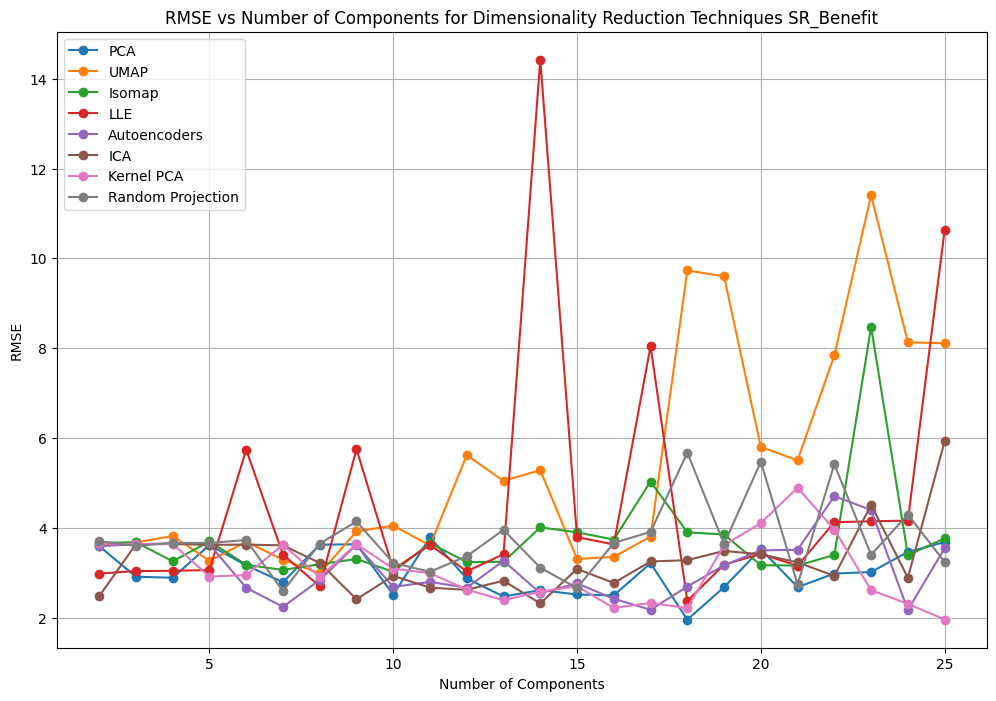

In [4]:
import pandas as pd
import joblib
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD, FastICA, KernelPCA
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding
from sklearn.random_projection import GaussianRandomProjection
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, ElasticNet, SGDRegressor, BayesianRidge, LinearRegression, RANSACRegressor, TheilSenRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import umap
import numpy as np
import os
import ast

# Define the data columns and results columns
data_columns = [
    'OF2', 'OF3', 'OF4', 'OF5', 'OF6', 'OF7', 'OF8', 'OF9', 'OF10', 'OF11', 'OF13', 'OF14', 'OF15', 'OF16', 'OF17',
    'OF18', 'OF19', 'OF20', 'OF21', 'OF22', 'OF23', 'OF24', 'OF25', 'OF26', 'OF27', 'OF28', 'OF30', 'OF31',
    'OF33', 'OF34', 'OF37', 'OF38', 'F1', 'F2', 'F3_a', 'F3_b', 'F3_c', 'F3_d', 'F3_e', 'F3_f', 'F3_g', 'F4', 'F5', 'F6',
    'F7', 'F8', 'F9', 'F10', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'F23',
    'F24', 'F25', 'F28', 'F29', 'F30', 'F31', 'F32', 'F33', 'F34', 'F35', 'F36', 'F37', 'F38', 'F39', 'F40',
    'F41', 'F43', 'F44', 'F45', 'F46', 'F47', 'F48', 'F49', 'F50', 'F51', 'F52', 'F53', 'F54', 'F55', 'F56', 'F57',
    'F58', 'F59', 'F62', 'F63', 'F64', 'F65', 'F67', 'F68', 'S1', 'S2', 'S4', 'S5'
]

results_columns = ['SR_Benefit']

# Implement dimensionality reduction techniques
dimensionality_reduction_techniques = {
    "PCA": PCA(n_components=10),
    "UMAP": umap.UMAP(n_components=10),
    "Isomap": Isomap(n_components=10),
    "LLE": LocallyLinearEmbedding(n_components=10),
    "Autoencoders": TruncatedSVD(n_components=10),  # Assuming TruncatedSVD as a simple autoencoder
    "ICA": FastICA(n_components=10),
    "Kernel PCA": KernelPCA(n_components=10),
    "Random Projection": GaussianRandomProjection(n_components=10)  # Assuming GaussianRandomProjection
}

# Define a mapping from model names to model classes
model_mapping = {
    'Ridge': Ridge,
    'DecisionTreeRegressor': DecisionTreeRegressor,
    'GradientBoostingRegressor': GradientBoostingRegressor,
    'RandomForestRegressor': RandomForestRegressor,
    'AdaBoostRegressor': AdaBoostRegressor,
    'KNeighborsRegressor': KNeighborsRegressor,
    'MLPRegressor': MLPRegressor,
    'ElasticNet': ElasticNet,
    'SGDRegressor': SGDRegressor,
    'SVR': SVR,
    'BayesianRidge': BayesianRidge,
    'KernelRidge': KernelRidge,
    'LinearRegression': LinearRegression,
    'RANSACRegressor': RANSACRegressor,
    'TheilSenRegressor': TheilSenRegressor
}

# Function to load, evaluate and retrain the model with dimensionality reduction
def load_evaluate_and_retrain_model(csv_file, model_name, model_path, hyperparameters):
    data = pd.read_csv(csv_file)
    X = data[data_columns]
    y = data[results_columns[0]]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Load the original model and calculate RMSE
    if model_name == 'TensorFlow':
        model = tf.keras.models.load_model(model_path)
        y_pred = model.predict(X_test_scaled)
    else:
        model = joblib.load(model_path)
        y_pred = model.predict(X_test_scaled)

    rmse_original = mean_squared_error(y_test, y_pred, squared=False)
    reduction_results = {'Original': rmse_original}

    # Iterate over a range of component values for each dimensionality reduction technique
    for name, reducer in dimensionality_reduction_techniques.items():
        print(f"Applying {name} dimensionality reduction")
        rmse_values = []
    
        for n_components in range(2, 26):  # Range from 2 to 25 components
            # Create a pipeline that includes scaling and dimensionality reduction
            if name == "t-SNE":
                # t-SNE requires special handling as it does not support transform
                X_concatenated = np.concatenate((X_train_scaled, X_test_scaled), axis=0)
                if n_components<=4:
                    reducer=TSNE(n_components=4)
                else:
                    reducer=TSNE(n_components=n_components)
                X_reduced = reducer.fit_transform(X_concatenated)
                X_train_reduced = X_reduced[:len(X_train_scaled)]
                X_test_reduced = X_reduced[len(X_train_scaled):]
            else:
                # Set the number of components for the reducer
                reducer.set_params(n_components=n_components)
                pipeline = Pipeline([
                    ('scaler', StandardScaler()),
                    ('reducer', reducer)
                ])
                X_train_reduced = pipeline.fit_transform(X_train)
                X_test_reduced = pipeline.transform(X_test)
    
            # Retrain the model with the reduced data
            if model_name == 'TensorFlow':
                model = tf.keras.Sequential([
                    tf.keras.layers.InputLayer(input_shape=(X_train_reduced.shape[1],)),
                    tf.keras.layers.Dense(hyperparameters['units'], activation=hyperparameters['activation']),
                    tf.keras.layers.Dense(1)
                ])
                model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hyperparameters['learning_rate']),
                              loss='mse')
                model.fit(X_train_reduced, y_train, epochs=hyperparameters['epochs'], verbose=0)
                y_pred = model.predict(X_test_reduced)
            else:
                # Dynamically select the model class based on the model name
                model_class = model_mapping.get(model_name)
                if not model_class:
                    print(f"Unknown model name: {model_name}")
                    continue
                
                # Filter hyperparameters for the selected model
                model_hyperparameters = {k.split('__', 1)[1]: v for k, v in hyperparameters.items() if k.startswith(model_name.lower())}
                model = model_class(**model_hyperparameters)
                model.fit(X_train_reduced, y_train)
                y_pred = model.predict(X_test_reduced)
    
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            rmse_values.append(rmse)
    
        reduction_results[name] = rmse_values

    return reduction_results
model_directory = "SR_Benefit"
import matplotlib.pyplot as plt

# Load the best models information
best_models_df = pd.read_csv("best_modelsSR_Benefit_info.csv")

# Find the row corresponding to the model with the lowest RMSE
best_model_row = best_models_df.loc[best_models_df['rmse'].idxmin()]

# Extract information about the best model
csv_file = os.path.join('./model_all_data', best_model_row['csv_file'])
model_name = best_model_row['model_name']
model_path = os.path.join(model_directory, f"{best_model_row['csv_file']}_{model_name}_model.pkl" if model_name != 'TensorFlow' else f"{best_model_row['csv_file']}_TensorFlow_model.h5")
hyperparameters = ast.literal_eval(best_model_row['hyperparameters'])

# Initialize figure
plt.figure(figsize=(10, 6))

# Evaluate the best model with dimensionality reduction
reduction_results = load_evaluate_and_retrain_model(csv_file, model_name, model_path, hyperparameters)



plt.figure(figsize=(12, 8))
# Plot RMSE values for each reduction method
for name, rmse_values in reduction_results.items():
    if name != 'Original':  # Skip 'Original' since it doesn't have varying components
        plt.plot(range(2, 26), rmse_values, label=name,marker='o',)

# Add labels and legend
plt.xlabel('Number of Components')
plt.ylabel('RMSE')
plt.title('RMSE vs Number of Components for Dimensionality Reduction Techniques '+ model_directory)
plt.legend()
plt.grid(True)
plt.savefig("dimensionality_reduction_rmse_plot_"+model_directory+"_best.png")
# Show plot
plt.show()


C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.4.1.post1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.4.1.post1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator AdaBoostRegressor from 

Applying PCA dimensionality reduction
Applying UMAP dimensionality reduction
Applying Isomap dimensionality reduction
Applying LLE dimensionality reduction
Applying Autoencoders dimensionality reduction
Applying ICA dimensionality reduction


C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\decomposition\_fastica.py:

Applying Kernel PCA dimensionality reduction
Applying Random Projection dimensionality reduction


<Figure size 1000x600 with 0 Axes>

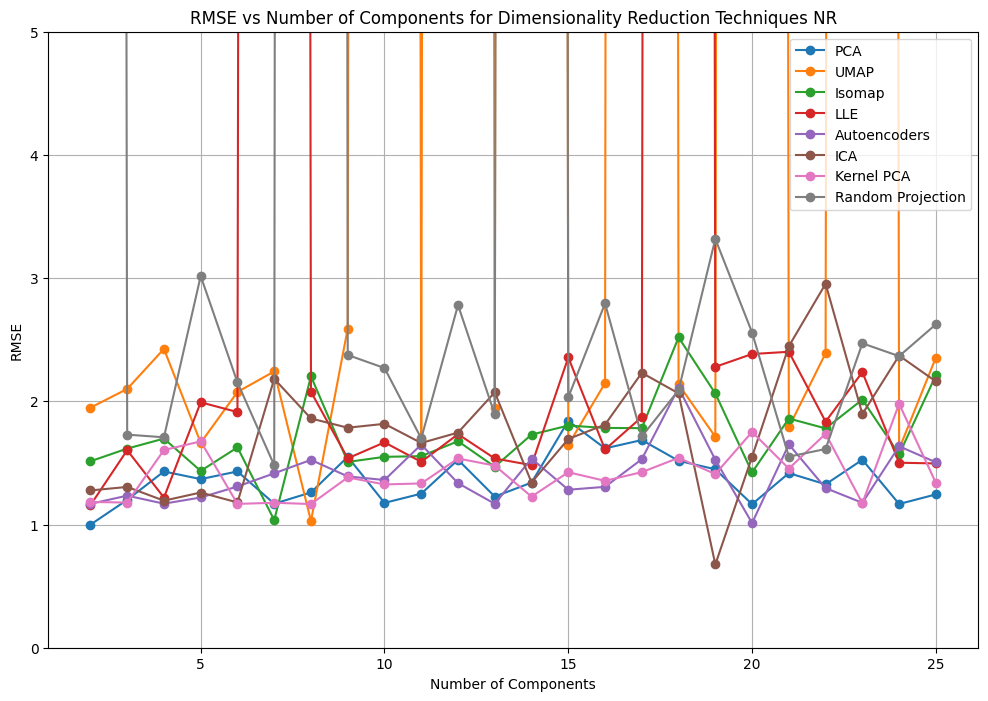

In [11]:
import pandas as pd
import joblib
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD, FastICA, KernelPCA
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding
from sklearn.random_projection import GaussianRandomProjection
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, ElasticNet, SGDRegressor, BayesianRidge, LinearRegression, RANSACRegressor, TheilSenRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import umap
import numpy as np
import os
import ast

# Define the data columns and results columns
data_columns = [
    'OF2', 'OF3', 'OF4', 'OF5', 'OF6', 'OF7', 'OF8', 'OF9', 'OF10', 'OF11', 'OF13', 'OF14', 'OF15', 'OF16', 'OF17',
    'OF18', 'OF19', 'OF20', 'OF21', 'OF22', 'OF23', 'OF24', 'OF25', 'OF26', 'OF27', 'OF28', 'OF30', 'OF31',
    'OF33', 'OF34', 'OF37', 'OF38', 'F1', 'F2', 'F3_a', 'F3_b', 'F3_c', 'F3_d', 'F3_e', 'F3_f', 'F3_g', 'F4', 'F5', 'F6',
    'F7', 'F8', 'F9', 'F10', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'F23',
    'F24', 'F25', 'F28', 'F29', 'F30', 'F31', 'F32', 'F33', 'F34', 'F35', 'F36', 'F37', 'F38', 'F39', 'F40',
    'F41', 'F43', 'F44', 'F45', 'F46', 'F47', 'F48', 'F49', 'F50', 'F51', 'F52', 'F53', 'F54', 'F55', 'F56', 'F57',
    'F58', 'F59', 'F62', 'F63', 'F64', 'F65', 'F67', 'F68', 'S1', 'S2', 'S4', 'S5'
]

results_columns = ['NR']

# Implement dimensionality reduction techniques
dimensionality_reduction_techniques = {
    "PCA": PCA(n_components=10),
    "UMAP": umap.UMAP(n_components=10),
    "Isomap": Isomap(n_components=10),
    "LLE": LocallyLinearEmbedding(n_components=10),
    "Autoencoders": TruncatedSVD(n_components=10),  # Assuming TruncatedSVD as a simple autoencoder
    "ICA": FastICA(n_components=10),
    "Kernel PCA": KernelPCA(n_components=10),
    "Random Projection": GaussianRandomProjection(n_components=10)  # Assuming GaussianRandomProjection
}

# Define a mapping from model names to model classes
model_mapping = {
    'Ridge': Ridge,
    'DecisionTreeRegressor': DecisionTreeRegressor,
    'GradientBoostingRegressor': GradientBoostingRegressor,
    'RandomForestRegressor': RandomForestRegressor,
    'AdaBoostRegressor': AdaBoostRegressor,
    'KNeighborsRegressor': KNeighborsRegressor,
    'MLPRegressor': MLPRegressor,
    'ElasticNet': ElasticNet,
    'SGDRegressor': SGDRegressor,
    'SVR': SVR,
    'BayesianRidge': BayesianRidge,
    'KernelRidge': KernelRidge,
    'LinearRegression': LinearRegression,
    'RANSACRegressor': RANSACRegressor,
    'TheilSenRegressor': TheilSenRegressor
}

# Function to load, evaluate and retrain the model with dimensionality reduction
def load_evaluate_and_retrain_model(csv_file, model_name, model_path, hyperparameters):
    data = pd.read_csv(csv_file)
    X = data[data_columns]
    y = data[results_columns[0]]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Load the original model and calculate RMSE
    if model_name == 'TensorFlow':
        model = tf.keras.models.load_model(model_path)
        y_pred = model.predict(X_test_scaled)
    else:
        model = joblib.load(model_path)
        y_pred = model.predict(X_test_scaled)

    rmse_original = mean_squared_error(y_test, y_pred, squared=False)
    reduction_results = {'Original': rmse_original}

    # Iterate over a range of component values for each dimensionality reduction technique
    for name, reducer in dimensionality_reduction_techniques.items():
        print(f"Applying {name} dimensionality reduction")
        rmse_values = []
    
        for n_components in range(2, 26):  # Range from 2 to 25 components
            # Create a pipeline that includes scaling and dimensionality reduction
            if name == "t-SNE":
                # t-SNE requires special handling as it does not support transform
                X_concatenated = np.concatenate((X_train_scaled, X_test_scaled), axis=0)
                if n_components<=4:
                    reducer=TSNE(n_components=4)
                else:
                    reducer=TSNE(n_components=n_components)
                X_reduced = reducer.fit_transform(X_concatenated)
                X_train_reduced = X_reduced[:len(X_train_scaled)]
                X_test_reduced = X_reduced[len(X_train_scaled):]
            else:
                # Set the number of components for the reducer
                reducer.set_params(n_components=n_components)
                pipeline = Pipeline([
                    ('scaler', StandardScaler()),
                    ('reducer', reducer)
                ])
                X_train_reduced = pipeline.fit_transform(X_train)
                X_test_reduced = pipeline.transform(X_test)
    
            # Retrain the model with the reduced data
            if model_name == 'TensorFlow':
                model = tf.keras.Sequential([
                    tf.keras.layers.InputLayer(input_shape=(X_train_reduced.shape[1],)),
                    tf.keras.layers.Dense(hyperparameters['units'], activation=hyperparameters['activation']),
                    tf.keras.layers.Dense(1)
                ])
                model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hyperparameters['learning_rate']),
                              loss='mse')
                model.fit(X_train_reduced, y_train, epochs=hyperparameters['epochs'], verbose=0)
                y_pred = model.predict(X_test_reduced)
            else:
                # Dynamically select the model class based on the model name
                model_class = model_mapping.get(model_name)
                if not model_class:
                    print(f"Unknown model name: {model_name}")
                    continue
                
                # Filter hyperparameters for the selected model
                model_hyperparameters = {k.split('__', 1)[1]: v for k, v in hyperparameters.items() if k.startswith(model_name.lower())}
                model = model_class(**model_hyperparameters)
                model.fit(X_train_reduced, y_train)
                y_pred = model.predict(X_test_reduced)
    
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            rmse_values.append(rmse)
    
        reduction_results[name] = rmse_values

    return reduction_results
model_directory = "NR"
import matplotlib.pyplot as plt

# Load the best models information
best_models_df = pd.read_csv("best_modelsNR_info.csv")

# Find the row corresponding to the model with the lowest RMSE
best_model_row = best_models_df.loc[best_models_df['rmse'].idxmin()]

# Extract information about the best model
csv_file = os.path.join('./model_all_data', best_model_row['csv_file'])
model_name = best_model_row['model_name']
model_path = os.path.join(model_directory, f"{best_model_row['csv_file']}_{model_name}_model.pkl" if model_name != 'TensorFlow' else f"{best_model_row['csv_file']}_TensorFlow_model.h5")
hyperparameters = ast.literal_eval(best_model_row['hyperparameters'])

# Initialize figure
plt.figure(figsize=(10, 6))

# Evaluate the best model with dimensionality reduction
reduction_results = load_evaluate_and_retrain_model(csv_file, model_name, model_path, hyperparameters)



plt.figure(figsize=(12, 8))
# Plot RMSE values for each reduction method
for name, rmse_values in reduction_results.items():
    if name != 'Original':  # Skip 'Original' since it doesn't have varying components
        plt.plot(range(2, 26), rmse_values, label=name,marker='o',)

# Add labels and legend
plt.xlabel('Number of Components')
plt.ylabel('RMSE')
plt.title('RMSE vs Number of Components for Dimensionality Reduction Techniques '+ model_directory)
plt.legend()
plt.grid(True)
plt.ylim(0, 5)
plt.savefig("dimensionality_reduction_rmse_plot_"+model_directory+"_best.png")
# Show plot
plt.show()


C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.4.1.post1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator MLPRegressor from version 1.4.1.post1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.4.1.post

Applying PCA dimensionality reduction


C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed t

Applying UMAP dimensionality reduction


C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed t

Applying Isomap dimensionality reduction


C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed t

Applying LLE dimensionality reduction
Applying Autoencoders dimensionality reduction


C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed t

Applying ICA dimensionality reduction


C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed t

Applying Kernel PCA dimensionality reduction


C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed t

Applying Random Projection dimensionality reduction


C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed t

<Figure size 1000x600 with 0 Axes>

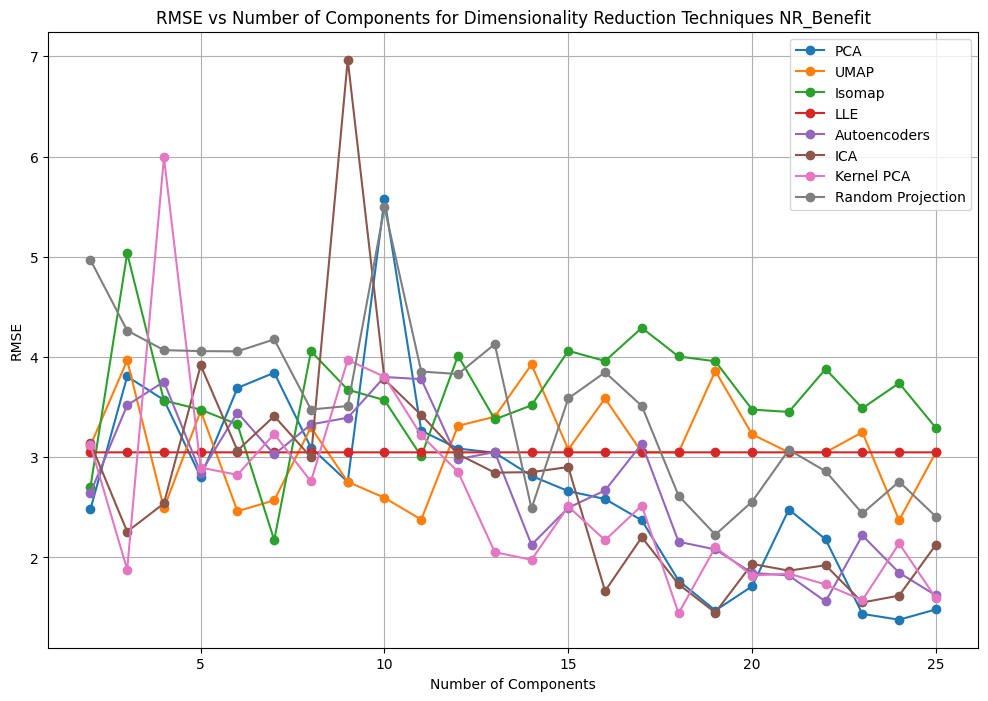

In [6]:
import pandas as pd
import joblib
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD, FastICA, KernelPCA
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding
from sklearn.random_projection import GaussianRandomProjection
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, ElasticNet, SGDRegressor, BayesianRidge, LinearRegression, RANSACRegressor, TheilSenRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import umap
import numpy as np
import os
import ast

# Define the data columns and results columns
data_columns = [
    'OF2', 'OF3', 'OF4', 'OF5', 'OF6', 'OF7', 'OF8', 'OF9', 'OF10', 'OF11', 'OF13', 'OF14', 'OF15', 'OF16', 'OF17',
    'OF18', 'OF19', 'OF20', 'OF21', 'OF22', 'OF23', 'OF24', 'OF25', 'OF26', 'OF27', 'OF28', 'OF30', 'OF31',
    'OF33', 'OF34', 'OF37', 'OF38', 'F1', 'F2', 'F3_a', 'F3_b', 'F3_c', 'F3_d', 'F3_e', 'F3_f', 'F3_g', 'F4', 'F5', 'F6',
    'F7', 'F8', 'F9', 'F10', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'F23',
    'F24', 'F25', 'F28', 'F29', 'F30', 'F31', 'F32', 'F33', 'F34', 'F35', 'F36', 'F37', 'F38', 'F39', 'F40',
    'F41', 'F43', 'F44', 'F45', 'F46', 'F47', 'F48', 'F49', 'F50', 'F51', 'F52', 'F53', 'F54', 'F55', 'F56', 'F57',
    'F58', 'F59', 'F62', 'F63', 'F64', 'F65', 'F67', 'F68', 'S1', 'S2', 'S4', 'S5'
]

results_columns = ['NR_Benefit']

# Implement dimensionality reduction techniques
dimensionality_reduction_techniques = {
    "PCA": PCA(n_components=10),
    "UMAP": umap.UMAP(n_components=10),
    "Isomap": Isomap(n_components=10),
    "LLE": LocallyLinearEmbedding(n_components=10),
    "Autoencoders": TruncatedSVD(n_components=10),  # Assuming TruncatedSVD as a simple autoencoder
    "ICA": FastICA(n_components=10),
    "Kernel PCA": KernelPCA(n_components=10),
    "Random Projection": GaussianRandomProjection(n_components=10)  # Assuming GaussianRandomProjection
}

# Define a mapping from model names to model classes
model_mapping = {
    'Ridge': Ridge,
    'DecisionTreeRegressor': DecisionTreeRegressor,
    'GradientBoostingRegressor': GradientBoostingRegressor,
    'RandomForestRegressor': RandomForestRegressor,
    'AdaBoostRegressor': AdaBoostRegressor,
    'KNeighborsRegressor': KNeighborsRegressor,
    'MLPRegressor': MLPRegressor,
    'ElasticNet': ElasticNet,
    'SGDRegressor': SGDRegressor,
    'SVR': SVR,
    'BayesianRidge': BayesianRidge,
    'KernelRidge': KernelRidge,
    'LinearRegression': LinearRegression,
    'RANSACRegressor': RANSACRegressor,
    'TheilSenRegressor': TheilSenRegressor
}

# Function to load, evaluate and retrain the model with dimensionality reduction
def load_evaluate_and_retrain_model(csv_file, model_name, model_path, hyperparameters):
    data = pd.read_csv(csv_file)
    X = data[data_columns]
    y = data[results_columns[0]]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Load the original model and calculate RMSE
    if model_name == 'TensorFlow':
        model = tf.keras.models.load_model(model_path)
        y_pred = model.predict(X_test_scaled)
    else:
        model = joblib.load(model_path)
        y_pred = model.predict(X_test_scaled)

    rmse_original = mean_squared_error(y_test, y_pred, squared=False)
    reduction_results = {'Original': rmse_original}

    # Iterate over a range of component values for each dimensionality reduction technique
    for name, reducer in dimensionality_reduction_techniques.items():
        print(f"Applying {name} dimensionality reduction")
        rmse_values = []
    
        for n_components in range(2, 26):  # Range from 2 to 25 components
            # Create a pipeline that includes scaling and dimensionality reduction
            if name == "t-SNE":
                # t-SNE requires special handling as it does not support transform
                X_concatenated = np.concatenate((X_train_scaled, X_test_scaled), axis=0)
                if n_components<=4:
                    reducer=TSNE(n_components=4)
                else:
                    reducer=TSNE(n_components=n_components)
                X_reduced = reducer.fit_transform(X_concatenated)
                X_train_reduced = X_reduced[:len(X_train_scaled)]
                X_test_reduced = X_reduced[len(X_train_scaled):]
            else:
                # Set the number of components for the reducer
                reducer.set_params(n_components=n_components)
                pipeline = Pipeline([
                    ('scaler', StandardScaler()),
                    ('reducer', reducer)
                ])
                X_train_reduced = pipeline.fit_transform(X_train)
                X_test_reduced = pipeline.transform(X_test)
    
            # Retrain the model with the reduced data
            if model_name == 'TensorFlow':
                model = tf.keras.Sequential([
                    tf.keras.layers.InputLayer(input_shape=(X_train_reduced.shape[1],)),
                    tf.keras.layers.Dense(hyperparameters['units'], activation=hyperparameters['activation']),
                    tf.keras.layers.Dense(1)
                ])
                model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hyperparameters['learning_rate']),
                              loss='mse')
                model.fit(X_train_reduced, y_train, epochs=hyperparameters['epochs'], verbose=0)
                y_pred = model.predict(X_test_reduced)
            else:
                # Dynamically select the model class based on the model name
                model_class = model_mapping.get(model_name)
                if not model_class:
                    print(f"Unknown model name: {model_name}")
                    continue
                
                # Filter hyperparameters for the selected model
                model_hyperparameters = {k.split('__', 1)[1]: v for k, v in hyperparameters.items() if k.startswith(model_name.lower())}
                model = model_class(**model_hyperparameters)
                model.fit(X_train_reduced, y_train)
                y_pred = model.predict(X_test_reduced)
    
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            rmse_values.append(rmse)
    
        reduction_results[name] = rmse_values

    return reduction_results
model_directory = "NR_Benefit"
import matplotlib.pyplot as plt

# Load the best models information
best_models_df = pd.read_csv("best_modelsNR_Benefit_info.csv")

# Find the row corresponding to the model with the lowest RMSE
best_model_row = best_models_df.loc[best_models_df['rmse'].idxmin()]

# Extract information about the best model
csv_file = os.path.join('./model_all_data', best_model_row['csv_file'])
model_name = best_model_row['model_name']
model_path = os.path.join(model_directory, f"{best_model_row['csv_file']}_{model_name}_model.pkl" if model_name != 'TensorFlow' else f"{best_model_row['csv_file']}_TensorFlow_model.h5")
hyperparameters = ast.literal_eval(best_model_row['hyperparameters'])

# Initialize figure
plt.figure(figsize=(10, 6))

# Evaluate the best model with dimensionality reduction
reduction_results = load_evaluate_and_retrain_model(csv_file, model_name, model_path, hyperparameters)



plt.figure(figsize=(12, 8))
# Plot RMSE values for each reduction method
for name, rmse_values in reduction_results.items():
    if name != 'Original':  # Skip 'Original' since it doesn't have varying components
        plt.plot(range(2, 26), rmse_values, label=name,marker='o',)

# Add labels and legend
plt.xlabel('Number of Components')
plt.ylabel('RMSE')
plt.title('RMSE vs Number of Components for Dimensionality Reduction Techniques '+ model_directory)
plt.legend()
plt.grid(True)
plt.savefig("dimensionality_reduction_rmse_plot_"+model_directory+"_best.png")
# Show plot
plt.show()


C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.4.1.post1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.4.1.post1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator AdaBoostRegressor from 

Applying PCA dimensionality reduction
Applying UMAP dimensionality reduction
Applying Isomap dimensionality reduction
Applying LLE dimensionality reduction
Applying Autoencoders dimensionality reduction
Applying ICA dimensionality reduction


C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\decomposition\_fastica.py:

Applying Kernel PCA dimensionality reduction
Applying Random Projection dimensionality reduction


<Figure size 1000x600 with 0 Axes>

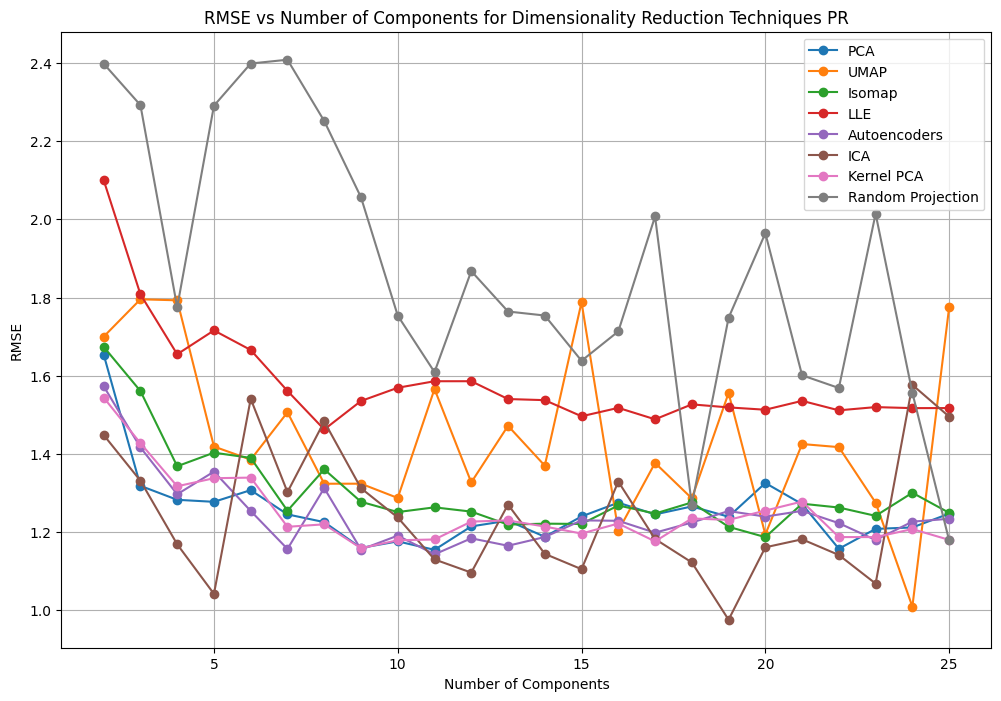

In [7]:
import pandas as pd
import joblib
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD, FastICA, KernelPCA
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding
from sklearn.random_projection import GaussianRandomProjection
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, ElasticNet, SGDRegressor, BayesianRidge, LinearRegression, RANSACRegressor, TheilSenRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import umap
import numpy as np
import os
import ast

# Define the data columns and results columns
data_columns = [
    'OF2', 'OF3', 'OF4', 'OF5', 'OF6', 'OF7', 'OF8', 'OF9', 'OF10', 'OF11', 'OF13', 'OF14', 'OF15', 'OF16', 'OF17',
    'OF18', 'OF19', 'OF20', 'OF21', 'OF22', 'OF23', 'OF24', 'OF25', 'OF26', 'OF27', 'OF28', 'OF30', 'OF31',
    'OF33', 'OF34', 'OF37', 'OF38', 'F1', 'F2', 'F3_a', 'F3_b', 'F3_c', 'F3_d', 'F3_e', 'F3_f', 'F3_g', 'F4', 'F5', 'F6',
    'F7', 'F8', 'F9', 'F10', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'F23',
    'F24', 'F25', 'F28', 'F29', 'F30', 'F31', 'F32', 'F33', 'F34', 'F35', 'F36', 'F37', 'F38', 'F39', 'F40',
    'F41', 'F43', 'F44', 'F45', 'F46', 'F47', 'F48', 'F49', 'F50', 'F51', 'F52', 'F53', 'F54', 'F55', 'F56', 'F57',
    'F58', 'F59', 'F62', 'F63', 'F64', 'F65', 'F67', 'F68', 'S1', 'S2', 'S4', 'S5'
]

results_columns = ['PR']

# Implement dimensionality reduction techniques
dimensionality_reduction_techniques = {
    "PCA": PCA(n_components=10),
    "UMAP": umap.UMAP(n_components=10),
    "Isomap": Isomap(n_components=10),
    "LLE": LocallyLinearEmbedding(n_components=10),
    "Autoencoders": TruncatedSVD(n_components=10),  # Assuming TruncatedSVD as a simple autoencoder
    "ICA": FastICA(n_components=10),
    "Kernel PCA": KernelPCA(n_components=10),
    "Random Projection": GaussianRandomProjection(n_components=10)  # Assuming GaussianRandomProjection
}

# Define a mapping from model names to model classes
model_mapping = {
    'Ridge': Ridge,
    'DecisionTreeRegressor': DecisionTreeRegressor,
    'GradientBoostingRegressor': GradientBoostingRegressor,
    'RandomForestRegressor': RandomForestRegressor,
    'AdaBoostRegressor': AdaBoostRegressor,
    'KNeighborsRegressor': KNeighborsRegressor,
    'MLPRegressor': MLPRegressor,
    'ElasticNet': ElasticNet,
    'SGDRegressor': SGDRegressor,
    'SVR': SVR,
    'BayesianRidge': BayesianRidge,
    'KernelRidge': KernelRidge,
    'LinearRegression': LinearRegression,
    'RANSACRegressor': RANSACRegressor,
    'TheilSenRegressor': TheilSenRegressor
}

# Function to load, evaluate and retrain the model with dimensionality reduction
def load_evaluate_and_retrain_model(csv_file, model_name, model_path, hyperparameters):
    data = pd.read_csv(csv_file)
    X = data[data_columns]
    y = data[results_columns[0]]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Load the original model and calculate RMSE
    if model_name == 'TensorFlow':
        model = tf.keras.models.load_model(model_path)
        y_pred = model.predict(X_test_scaled)
    else:
        model = joblib.load(model_path)
        y_pred = model.predict(X_test_scaled)

    rmse_original = mean_squared_error(y_test, y_pred, squared=False)
    reduction_results = {'Original': rmse_original}

    # Iterate over a range of component values for each dimensionality reduction technique
    for name, reducer in dimensionality_reduction_techniques.items():
        print(f"Applying {name} dimensionality reduction")
        rmse_values = []
    
        for n_components in range(2, 26):  # Range from 2 to 25 components
            # Create a pipeline that includes scaling and dimensionality reduction
            if name == "t-SNE":
                # t-SNE requires special handling as it does not support transform
                X_concatenated = np.concatenate((X_train_scaled, X_test_scaled), axis=0)
                if n_components<=4:
                    reducer=TSNE(n_components=4)
                else:
                    reducer=TSNE(n_components=n_components)
                X_reduced = reducer.fit_transform(X_concatenated)
                X_train_reduced = X_reduced[:len(X_train_scaled)]
                X_test_reduced = X_reduced[len(X_train_scaled):]
            else:
                # Set the number of components for the reducer
                reducer.set_params(n_components=n_components)
                pipeline = Pipeline([
                    ('scaler', StandardScaler()),
                    ('reducer', reducer)
                ])
                X_train_reduced = pipeline.fit_transform(X_train)
                X_test_reduced = pipeline.transform(X_test)
    
            # Retrain the model with the reduced data
            if model_name == 'TensorFlow':
                model = tf.keras.Sequential([
                    tf.keras.layers.InputLayer(input_shape=(X_train_reduced.shape[1],)),
                    tf.keras.layers.Dense(hyperparameters['units'], activation=hyperparameters['activation']),
                    tf.keras.layers.Dense(1)
                ])
                model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hyperparameters['learning_rate']),
                              loss='mse')
                model.fit(X_train_reduced, y_train, epochs=hyperparameters['epochs'], verbose=0)
                y_pred = model.predict(X_test_reduced)
            else:
                # Dynamically select the model class based on the model name
                model_class = model_mapping.get(model_name)
                if not model_class:
                    print(f"Unknown model name: {model_name}")
                    continue
                
                # Filter hyperparameters for the selected model
                model_hyperparameters = {k.split('__', 1)[1]: v for k, v in hyperparameters.items() if k.startswith(model_name.lower())}
                model = model_class(**model_hyperparameters)
                model.fit(X_train_reduced, y_train)
                y_pred = model.predict(X_test_reduced)
    
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            rmse_values.append(rmse)
    
        reduction_results[name] = rmse_values

    return reduction_results
model_directory = "PR"
import matplotlib.pyplot as plt

# Load the best models information
best_models_df = pd.read_csv("best_modelsPR_info.csv")

# Find the row corresponding to the model with the lowest RMSE
best_model_row = best_models_df.loc[best_models_df['rmse'].idxmin()]

# Extract information about the best model
csv_file = os.path.join('./model_all_data', best_model_row['csv_file'])
model_name = best_model_row['model_name']
model_path = os.path.join(model_directory, f"{best_model_row['csv_file']}_{model_name}_model.pkl" if model_name != 'TensorFlow' else f"{best_model_row['csv_file']}_TensorFlow_model.h5")
hyperparameters = ast.literal_eval(best_model_row['hyperparameters'])

# Initialize figure
plt.figure(figsize=(10, 6))

# Evaluate the best model with dimensionality reduction
reduction_results = load_evaluate_and_retrain_model(csv_file, model_name, model_path, hyperparameters)



plt.figure(figsize=(12, 8))
# Plot RMSE values for each reduction method
for name, rmse_values in reduction_results.items():
    if name != 'Original':  # Skip 'Original' since it doesn't have varying components
        plt.plot(range(2, 26), rmse_values, label=name,marker='o',)

# Add labels and legend
plt.xlabel('Number of Components')
plt.ylabel('RMSE')
plt.title('RMSE vs Number of Components for Dimensionality Reduction Techniques '+ model_directory)
plt.legend()
plt.grid(True)
plt.savefig("dimensionality_reduction_rmse_plot_"+model_directory+"_best.png")
# Show plot
plt.show()


C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.4.1.post1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator MLPRegressor from version 1.4.1.post1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.4.1.post

Applying PCA dimensionality reduction


C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed t

Applying UMAP dimensionality reduction


C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed t

Applying Isomap dimensionality reduction


C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed t

Applying LLE dimensionality reduction


C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed t

Applying Autoencoders dimensionality reduction


C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed t

Applying ICA dimensionality reduction


C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed t

Applying Kernel PCA dimensionality reduction


C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed t

Applying Random Projection dimensionality reduction


C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed t

<Figure size 1000x600 with 0 Axes>

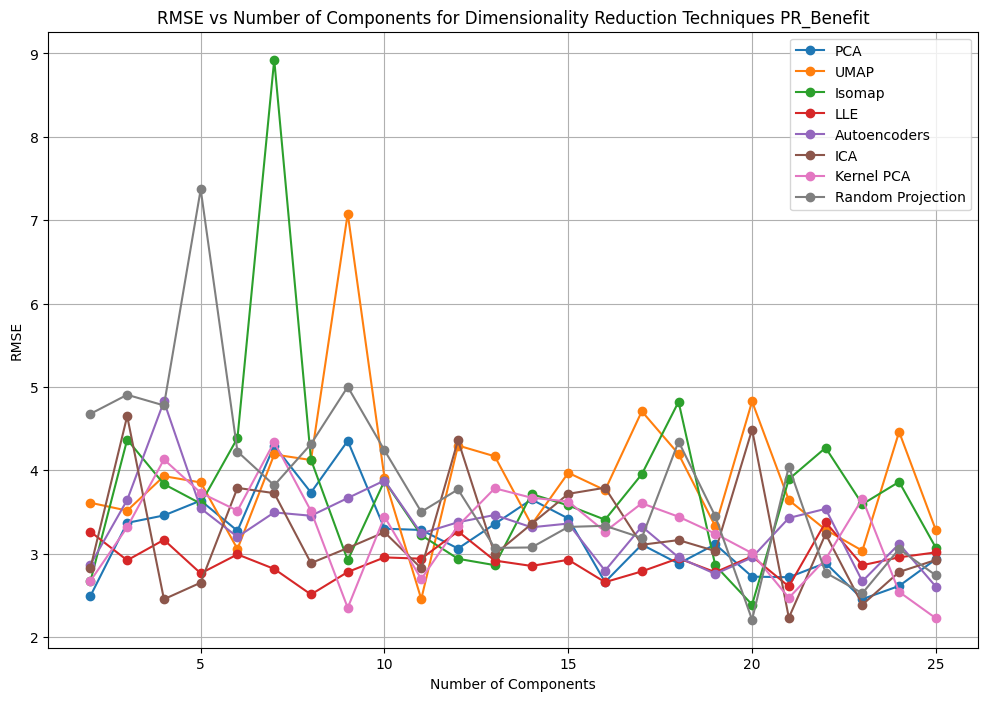

In [8]:
import pandas as pd
import joblib
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD, FastICA, KernelPCA
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding
from sklearn.random_projection import GaussianRandomProjection
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, ElasticNet, SGDRegressor, BayesianRidge, LinearRegression, RANSACRegressor, TheilSenRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import umap
import numpy as np
import os
import ast

# Define the data columns and results columns
data_columns = [
    'OF2', 'OF3', 'OF4', 'OF5', 'OF6', 'OF7', 'OF8', 'OF9', 'OF10', 'OF11', 'OF13', 'OF14', 'OF15', 'OF16', 'OF17',
    'OF18', 'OF19', 'OF20', 'OF21', 'OF22', 'OF23', 'OF24', 'OF25', 'OF26', 'OF27', 'OF28', 'OF30', 'OF31',
    'OF33', 'OF34', 'OF37', 'OF38', 'F1', 'F2', 'F3_a', 'F3_b', 'F3_c', 'F3_d', 'F3_e', 'F3_f', 'F3_g', 'F4', 'F5', 'F6',
    'F7', 'F8', 'F9', 'F10', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'F23',
    'F24', 'F25', 'F28', 'F29', 'F30', 'F31', 'F32', 'F33', 'F34', 'F35', 'F36', 'F37', 'F38', 'F39', 'F40',
    'F41', 'F43', 'F44', 'F45', 'F46', 'F47', 'F48', 'F49', 'F50', 'F51', 'F52', 'F53', 'F54', 'F55', 'F56', 'F57',
    'F58', 'F59', 'F62', 'F63', 'F64', 'F65', 'F67', 'F68', 'S1', 'S2', 'S4', 'S5'
]

results_columns = ['PR_Benefit']

# Implement dimensionality reduction techniques
dimensionality_reduction_techniques = {
    "PCA": PCA(n_components=10),
    "UMAP": umap.UMAP(n_components=10),
    "Isomap": Isomap(n_components=10),
    "LLE": LocallyLinearEmbedding(n_components=10),
    "Autoencoders": TruncatedSVD(n_components=10),  # Assuming TruncatedSVD as a simple autoencoder
    "ICA": FastICA(n_components=10),
    "Kernel PCA": KernelPCA(n_components=10),
    "Random Projection": GaussianRandomProjection(n_components=10)  # Assuming GaussianRandomProjection
}

# Define a mapping from model names to model classes
model_mapping = {
    'Ridge': Ridge,
    'DecisionTreeRegressor': DecisionTreeRegressor,
    'GradientBoostingRegressor': GradientBoostingRegressor,
    'RandomForestRegressor': RandomForestRegressor,
    'AdaBoostRegressor': AdaBoostRegressor,
    'KNeighborsRegressor': KNeighborsRegressor,
    'MLPRegressor': MLPRegressor,
    'ElasticNet': ElasticNet,
    'SGDRegressor': SGDRegressor,
    'SVR': SVR,
    'BayesianRidge': BayesianRidge,
    'KernelRidge': KernelRidge,
    'LinearRegression': LinearRegression,
    'RANSACRegressor': RANSACRegressor,
    'TheilSenRegressor': TheilSenRegressor
}

# Function to load, evaluate and retrain the model with dimensionality reduction
def load_evaluate_and_retrain_model(csv_file, model_name, model_path, hyperparameters):
    data = pd.read_csv(csv_file)
    X = data[data_columns]
    y = data[results_columns[0]]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Load the original model and calculate RMSE
    if model_name == 'TensorFlow':
        model = tf.keras.models.load_model(model_path)
        y_pred = model.predict(X_test_scaled)
    else:
        model = joblib.load(model_path)
        y_pred = model.predict(X_test_scaled)

    rmse_original = mean_squared_error(y_test, y_pred, squared=False)
    reduction_results = {'Original': rmse_original}

    # Iterate over a range of component values for each dimensionality reduction technique
    for name, reducer in dimensionality_reduction_techniques.items():
        print(f"Applying {name} dimensionality reduction")
        rmse_values = []
    
        for n_components in range(2, 26):  # Range from 2 to 25 components
            # Create a pipeline that includes scaling and dimensionality reduction
            if name == "t-SNE":
                # t-SNE requires special handling as it does not support transform
                X_concatenated = np.concatenate((X_train_scaled, X_test_scaled), axis=0)
                if n_components<=4:
                    reducer=TSNE(n_components=4)
                else:
                    reducer=TSNE(n_components=n_components)
                X_reduced = reducer.fit_transform(X_concatenated)
                X_train_reduced = X_reduced[:len(X_train_scaled)]
                X_test_reduced = X_reduced[len(X_train_scaled):]
            else:
                # Set the number of components for the reducer
                reducer.set_params(n_components=n_components)
                pipeline = Pipeline([
                    ('scaler', StandardScaler()),
                    ('reducer', reducer)
                ])
                X_train_reduced = pipeline.fit_transform(X_train)
                X_test_reduced = pipeline.transform(X_test)
    
            # Retrain the model with the reduced data
            if model_name == 'TensorFlow':
                model = tf.keras.Sequential([
                    tf.keras.layers.InputLayer(input_shape=(X_train_reduced.shape[1],)),
                    tf.keras.layers.Dense(hyperparameters['units'], activation=hyperparameters['activation']),
                    tf.keras.layers.Dense(1)
                ])
                model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hyperparameters['learning_rate']),
                              loss='mse')
                model.fit(X_train_reduced, y_train, epochs=hyperparameters['epochs'], verbose=0)
                y_pred = model.predict(X_test_reduced)
            else:
                # Dynamically select the model class based on the model name
                model_class = model_mapping.get(model_name)
                if not model_class:
                    print(f"Unknown model name: {model_name}")
                    continue
                
                # Filter hyperparameters for the selected model
                model_hyperparameters = {k.split('__', 1)[1]: v for k, v in hyperparameters.items() if k.startswith(model_name.lower())}
                model = model_class(**model_hyperparameters)
                model.fit(X_train_reduced, y_train)
                y_pred = model.predict(X_test_reduced)
    
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            rmse_values.append(rmse)
    
        reduction_results[name] = rmse_values

    return reduction_results
model_directory = "PR_Benefit"
import matplotlib.pyplot as plt

# Load the best models information
best_models_df = pd.read_csv("best_modelsPR_Benefit_info.csv")

# Find the row corresponding to the model with the lowest RMSE
best_model_row = best_models_df.loc[best_models_df['rmse'].idxmin()]

# Extract information about the best model
csv_file = os.path.join('./model_all_data', best_model_row['csv_file'])
model_name = best_model_row['model_name']
model_path = os.path.join(model_directory, f"{best_model_row['csv_file']}_{model_name}_model.pkl" if model_name != 'TensorFlow' else f"{best_model_row['csv_file']}_TensorFlow_model.h5")
hyperparameters = ast.literal_eval(best_model_row['hyperparameters'])

# Initialize figure
plt.figure(figsize=(10, 6))

# Evaluate the best model with dimensionality reduction
reduction_results = load_evaluate_and_retrain_model(csv_file, model_name, model_path, hyperparameters)



plt.figure(figsize=(12, 8))
# Plot RMSE values for each reduction method
for name, rmse_values in reduction_results.items():
    if name != 'Original':  # Skip 'Original' since it doesn't have varying components
        plt.plot(range(2, 26), rmse_values, label=name,marker='o',)

# Add labels and legend
plt.xlabel('Number of Components')
plt.ylabel('RMSE')
plt.title('RMSE vs Number of Components for Dimensionality Reduction Techniques '+ model_directory)
plt.legend()
plt.grid(True)
plt.savefig("dimensionality_reduction_rmse_plot_"+model_directory+"_best.png")
# Show plot
plt.show()


C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.4.1.post1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.4.1.post1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator AdaBoostRegressor from 

Applying PCA dimensionality reduction
Applying UMAP dimensionality reduction
Applying Isomap dimensionality reduction
Applying LLE dimensionality reduction
Applying Autoencoders dimensionality reduction
Applying ICA dimensionality reduction


C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\decomposition\_fastica.py:

Applying Kernel PCA dimensionality reduction
Applying Random Projection dimensionality reduction


<Figure size 1000x600 with 0 Axes>

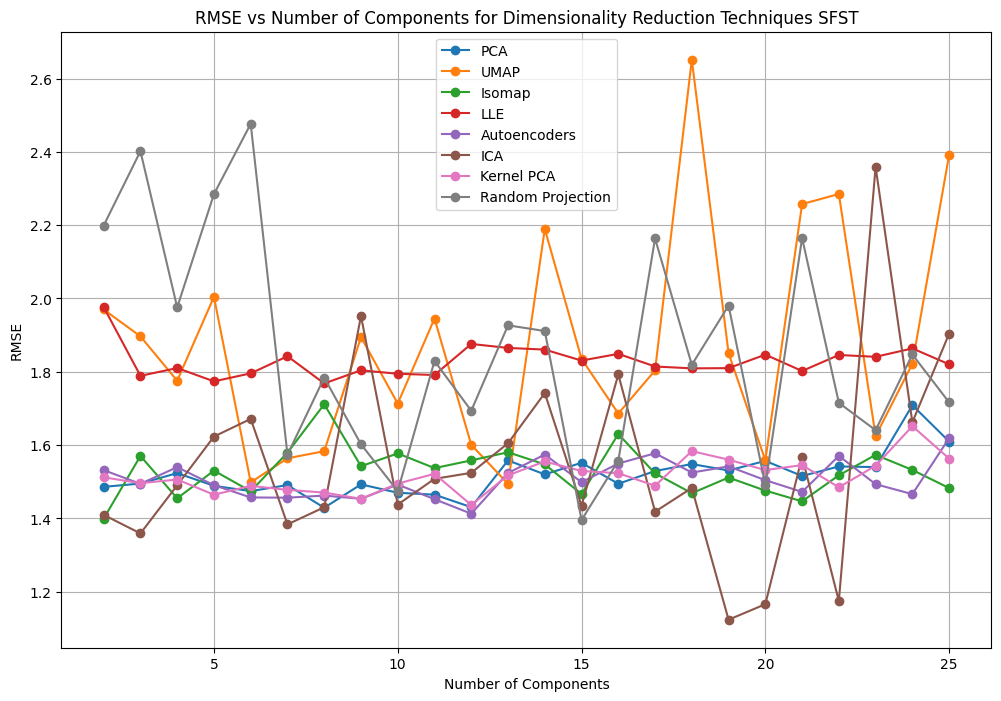

In [9]:
import pandas as pd
import joblib
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD, FastICA, KernelPCA
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding
from sklearn.random_projection import GaussianRandomProjection
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, ElasticNet, SGDRegressor, BayesianRidge, LinearRegression, RANSACRegressor, TheilSenRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import umap
import numpy as np
import os
import ast

# Define the data columns and results columns
data_columns = [
    'OF2', 'OF3', 'OF4', 'OF5', 'OF6', 'OF7', 'OF8', 'OF9', 'OF10', 'OF11', 'OF13', 'OF14', 'OF15', 'OF16', 'OF17',
    'OF18', 'OF19', 'OF20', 'OF21', 'OF22', 'OF23', 'OF24', 'OF25', 'OF26', 'OF27', 'OF28', 'OF30', 'OF31',
    'OF33', 'OF34', 'OF37', 'OF38', 'F1', 'F2', 'F3_a', 'F3_b', 'F3_c', 'F3_d', 'F3_e', 'F3_f', 'F3_g', 'F4', 'F5', 'F6',
    'F7', 'F8', 'F9', 'F10', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'F23',
    'F24', 'F25', 'F28', 'F29', 'F30', 'F31', 'F32', 'F33', 'F34', 'F35', 'F36', 'F37', 'F38', 'F39', 'F40',
    'F41', 'F43', 'F44', 'F45', 'F46', 'F47', 'F48', 'F49', 'F50', 'F51', 'F52', 'F53', 'F54', 'F55', 'F56', 'F57',
    'F58', 'F59', 'F62', 'F63', 'F64', 'F65', 'F67', 'F68', 'S1', 'S2', 'S4', 'S5'
]

results_columns = ['SFST']

# Implement dimensionality reduction techniques
dimensionality_reduction_techniques = {
    "PCA": PCA(n_components=10),
    "UMAP": umap.UMAP(n_components=10),
    "Isomap": Isomap(n_components=10),
    "LLE": LocallyLinearEmbedding(n_components=10),
    "Autoencoders": TruncatedSVD(n_components=10),  # Assuming TruncatedSVD as a simple autoencoder
    "ICA": FastICA(n_components=10),
    "Kernel PCA": KernelPCA(n_components=10),
    "Random Projection": GaussianRandomProjection(n_components=10)  # Assuming GaussianRandomProjection
}

# Define a mapping from model names to model classes
model_mapping = {
    'Ridge': Ridge,
    'DecisionTreeRegressor': DecisionTreeRegressor,
    'GradientBoostingRegressor': GradientBoostingRegressor,
    'RandomForestRegressor': RandomForestRegressor,
    'AdaBoostRegressor': AdaBoostRegressor,
    'KNeighborsRegressor': KNeighborsRegressor,
    'MLPRegressor': MLPRegressor,
    'ElasticNet': ElasticNet,
    'SGDRegressor': SGDRegressor,
    'SVR': SVR,
    'BayesianRidge': BayesianRidge,
    'KernelRidge': KernelRidge,
    'LinearRegression': LinearRegression,
    'RANSACRegressor': RANSACRegressor,
    'TheilSenRegressor': TheilSenRegressor
}

# Function to load, evaluate and retrain the model with dimensionality reduction
def load_evaluate_and_retrain_model(csv_file, model_name, model_path, hyperparameters):
    data = pd.read_csv(csv_file)
    X = data[data_columns]
    y = data[results_columns[0]]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Load the original model and calculate RMSE
    if model_name == 'TensorFlow':
        model = tf.keras.models.load_model(model_path)
        y_pred = model.predict(X_test_scaled)
    else:
        model = joblib.load(model_path)
        y_pred = model.predict(X_test_scaled)

    rmse_original = mean_squared_error(y_test, y_pred, squared=False)
    reduction_results = {'Original': rmse_original}

    # Iterate over a range of component values for each dimensionality reduction technique
    for name, reducer in dimensionality_reduction_techniques.items():
        print(f"Applying {name} dimensionality reduction")
        rmse_values = []
    
        for n_components in range(2, 26):  # Range from 2 to 25 components
            # Create a pipeline that includes scaling and dimensionality reduction
            if name == "t-SNE":
                # t-SNE requires special handling as it does not support transform
                X_concatenated = np.concatenate((X_train_scaled, X_test_scaled), axis=0)
                if n_components<=4:
                    reducer=TSNE(n_components=4)
                else:
                    reducer=TSNE(n_components=n_components)
                X_reduced = reducer.fit_transform(X_concatenated)
                X_train_reduced = X_reduced[:len(X_train_scaled)]
                X_test_reduced = X_reduced[len(X_train_scaled):]
            else:
                # Set the number of components for the reducer
                reducer.set_params(n_components=n_components)
                pipeline = Pipeline([
                    ('scaler', StandardScaler()),
                    ('reducer', reducer)
                ])
                X_train_reduced = pipeline.fit_transform(X_train)
                X_test_reduced = pipeline.transform(X_test)
    
            # Retrain the model with the reduced data
            if model_name == 'TensorFlow':
                model = tf.keras.Sequential([
                    tf.keras.layers.InputLayer(input_shape=(X_train_reduced.shape[1],)),
                    tf.keras.layers.Dense(hyperparameters['units'], activation=hyperparameters['activation']),
                    tf.keras.layers.Dense(1)
                ])
                model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hyperparameters['learning_rate']),
                              loss='mse')
                model.fit(X_train_reduced, y_train, epochs=hyperparameters['epochs'], verbose=0)
                y_pred = model.predict(X_test_reduced)
            else:
                # Dynamically select the model class based on the model name
                model_class = model_mapping.get(model_name)
                if not model_class:
                    print(f"Unknown model name: {model_name}")
                    continue
                
                # Filter hyperparameters for the selected model
                model_hyperparameters = {k.split('__', 1)[1]: v for k, v in hyperparameters.items() if k.startswith(model_name.lower())}
                model = model_class(**model_hyperparameters)
                model.fit(X_train_reduced, y_train)
                y_pred = model.predict(X_test_reduced)
    
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            rmse_values.append(rmse)
    
        reduction_results[name] = rmse_values

    return reduction_results
model_directory = "SFST"
import matplotlib.pyplot as plt

# Load the best models information
best_models_df = pd.read_csv("best_modelsSFST_info.csv")

# Find the row corresponding to the model with the lowest RMSE
best_model_row = best_models_df.loc[best_models_df['rmse'].idxmin()]

# Extract information about the best model
csv_file = os.path.join('./model_all_data', best_model_row['csv_file'])
model_name = best_model_row['model_name']
model_path = os.path.join(model_directory, f"{best_model_row['csv_file']}_{model_name}_model.pkl" if model_name != 'TensorFlow' else f"{best_model_row['csv_file']}_TensorFlow_model.h5")
hyperparameters = ast.literal_eval(best_model_row['hyperparameters'])

# Initialize figure
plt.figure(figsize=(10, 6))

# Evaluate the best model with dimensionality reduction
reduction_results = load_evaluate_and_retrain_model(csv_file, model_name, model_path, hyperparameters)



plt.figure(figsize=(12, 8))
# Plot RMSE values for each reduction method
for name, rmse_values in reduction_results.items():
    if name != 'Original':  # Skip 'Original' since it doesn't have varying components
        plt.plot(range(2, 26), rmse_values, label=name,marker='o',)

# Add labels and legend
plt.xlabel('Number of Components')
plt.ylabel('RMSE')
plt.title('RMSE vs Number of Components for Dimensionality Reduction Techniques '+ model_directory)
plt.legend()
plt.grid(True)
plt.savefig("dimensionality_reduction_rmse_plot_"+model_directory+"_best.png")
# Show plot
plt.show()


C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.4.1.post1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.4.1.post1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator AdaBoostRegressor from 

Applying PCA dimensionality reduction
Applying UMAP dimensionality reduction
Applying Isomap dimensionality reduction
Applying LLE dimensionality reduction
Applying Autoencoders dimensionality reduction
Applying ICA dimensionality reduction


C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\marcb\anaconda3\envs\greystone\Lib\site-packages\sklearn\decomposition\_fastica.py:

Applying Kernel PCA dimensionality reduction
Applying Random Projection dimensionality reduction


<Figure size 1000x600 with 0 Axes>

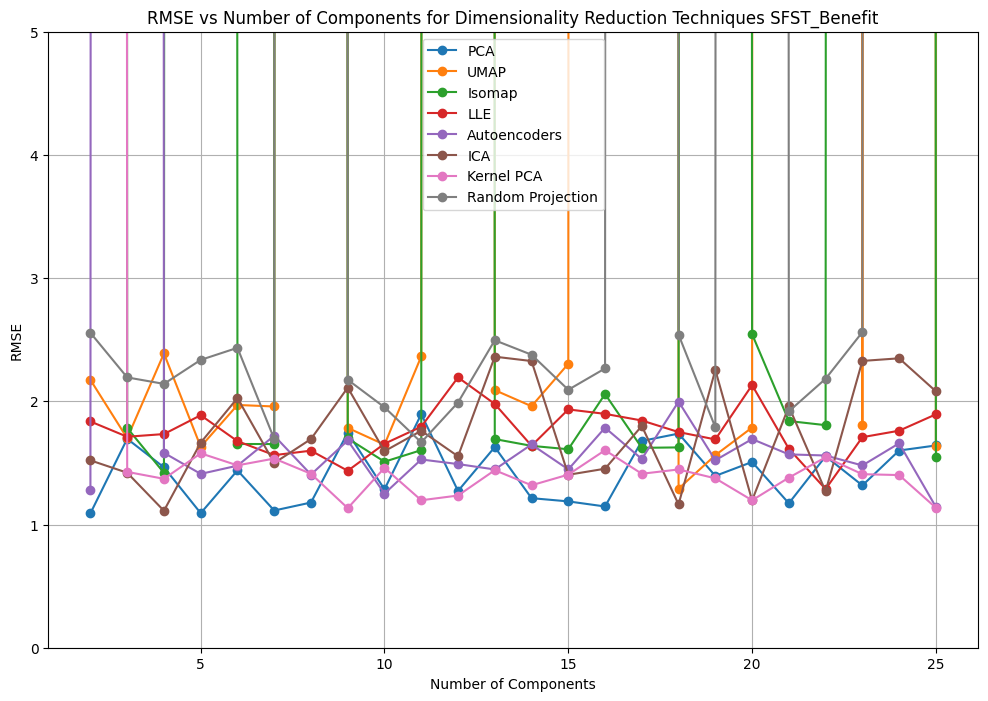

In [13]:
import pandas as pd
import joblib
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD, FastICA, KernelPCA
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding
from sklearn.random_projection import GaussianRandomProjection
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, ElasticNet, SGDRegressor, BayesianRidge, LinearRegression, RANSACRegressor, TheilSenRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import umap
import numpy as np
import os
import ast

# Define the data columns and results columns
data_columns = [
    'OF2', 'OF3', 'OF4', 'OF5', 'OF6', 'OF7', 'OF8', 'OF9', 'OF10', 'OF11', 'OF13', 'OF14', 'OF15', 'OF16', 'OF17',
    'OF18', 'OF19', 'OF20', 'OF21', 'OF22', 'OF23', 'OF24', 'OF25', 'OF26', 'OF27', 'OF28', 'OF30', 'OF31',
    'OF33', 'OF34', 'OF37', 'OF38', 'F1', 'F2', 'F3_a', 'F3_b', 'F3_c', 'F3_d', 'F3_e', 'F3_f', 'F3_g', 'F4', 'F5', 'F6',
    'F7', 'F8', 'F9', 'F10', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'F23',
    'F24', 'F25', 'F28', 'F29', 'F30', 'F31', 'F32', 'F33', 'F34', 'F35', 'F36', 'F37', 'F38', 'F39', 'F40',
    'F41', 'F43', 'F44', 'F45', 'F46', 'F47', 'F48', 'F49', 'F50', 'F51', 'F52', 'F53', 'F54', 'F55', 'F56', 'F57',
    'F58', 'F59', 'F62', 'F63', 'F64', 'F65', 'F67', 'F68', 'S1', 'S2', 'S4', 'S5'
]

results_columns = ['SFST_Benefit']

# Implement dimensionality reduction techniques
dimensionality_reduction_techniques = {
    "PCA": PCA(n_components=10),
    "UMAP": umap.UMAP(n_components=10),
    "Isomap": Isomap(n_components=10),
    "LLE": LocallyLinearEmbedding(n_components=10),
    "Autoencoders": TruncatedSVD(n_components=10),  # Assuming TruncatedSVD as a simple autoencoder
    "ICA": FastICA(n_components=10),
    "Kernel PCA": KernelPCA(n_components=10),
    "Random Projection": GaussianRandomProjection(n_components=10)  # Assuming GaussianRandomProjection
}

# Define a mapping from model names to model classes
model_mapping = {
    'Ridge': Ridge,
    'DecisionTreeRegressor': DecisionTreeRegressor,
    'GradientBoostingRegressor': GradientBoostingRegressor,
    'RandomForestRegressor': RandomForestRegressor,
    'AdaBoostRegressor': AdaBoostRegressor,
    'KNeighborsRegressor': KNeighborsRegressor,
    'MLPRegressor': MLPRegressor,
    'ElasticNet': ElasticNet,
    'SGDRegressor': SGDRegressor,
    'SVR': SVR,
    'BayesianRidge': BayesianRidge,
    'KernelRidge': KernelRidge,
    'LinearRegression': LinearRegression,
    'RANSACRegressor': RANSACRegressor,
    'TheilSenRegressor': TheilSenRegressor
}

# Function to load, evaluate and retrain the model with dimensionality reduction
def load_evaluate_and_retrain_model(csv_file, model_name, model_path, hyperparameters):
    data = pd.read_csv(csv_file)
    X = data[data_columns]
    y = data[results_columns[0]]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Load the original model and calculate RMSE
    if model_name == 'TensorFlow':
        model = tf.keras.models.load_model(model_path)
        y_pred = model.predict(X_test_scaled)
    else:
        model = joblib.load(model_path)
        y_pred = model.predict(X_test_scaled)

    rmse_original = mean_squared_error(y_test, y_pred, squared=False)
    reduction_results = {'Original': rmse_original}

    # Iterate over a range of component values for each dimensionality reduction technique
    for name, reducer in dimensionality_reduction_techniques.items():
        print(f"Applying {name} dimensionality reduction")
        rmse_values = []
    
        for n_components in range(2, 26):  # Range from 2 to 25 components
            # Create a pipeline that includes scaling and dimensionality reduction
            if name == "t-SNE":
                # t-SNE requires special handling as it does not support transform
                X_concatenated = np.concatenate((X_train_scaled, X_test_scaled), axis=0)
                if n_components<=4:
                    reducer=TSNE(n_components=4)
                else:
                    reducer=TSNE(n_components=n_components)
                X_reduced = reducer.fit_transform(X_concatenated)
                X_train_reduced = X_reduced[:len(X_train_scaled)]
                X_test_reduced = X_reduced[len(X_train_scaled):]
            else:
                # Set the number of components for the reducer
                reducer.set_params(n_components=n_components)
                pipeline = Pipeline([
                    ('scaler', StandardScaler()),
                    ('reducer', reducer)
                ])
                X_train_reduced = pipeline.fit_transform(X_train)
                X_test_reduced = pipeline.transform(X_test)
    
            # Retrain the model with the reduced data
            if model_name == 'TensorFlow':
                model = tf.keras.Sequential([
                    tf.keras.layers.InputLayer(input_shape=(X_train_reduced.shape[1],)),
                    tf.keras.layers.Dense(hyperparameters['units'], activation=hyperparameters['activation']),
                    tf.keras.layers.Dense(1)
                ])
                model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hyperparameters['learning_rate']),
                              loss='mse')
                model.fit(X_train_reduced, y_train, epochs=hyperparameters['epochs'], verbose=0)
                y_pred = model.predict(X_test_reduced)
            else:
                # Dynamically select the model class based on the model name
                model_class = model_mapping.get(model_name)
                if not model_class:
                    print(f"Unknown model name: {model_name}")
                    continue
                
                # Filter hyperparameters for the selected model
                model_hyperparameters = {k.split('__', 1)[1]: v for k, v in hyperparameters.items() if k.startswith(model_name.lower())}
                model = model_class(**model_hyperparameters)
                model.fit(X_train_reduced, y_train)
                y_pred = model.predict(X_test_reduced)
    
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            rmse_values.append(rmse)
    
        reduction_results[name] = rmse_values

    return reduction_results
model_directory = "SFST_Benefit"
import matplotlib.pyplot as plt

# Load the best models information
best_models_df = pd.read_csv("best_modelsSFST_Benefit_info.csv")

# Find the row corresponding to the model with the lowest RMSE
best_model_row = best_models_df.loc[best_models_df['rmse'].idxmin()]

# Extract information about the best model
csv_file = os.path.join('./model_all_data', best_model_row['csv_file'])
model_name = best_model_row['model_name']
model_path = os.path.join(model_directory, f"{best_model_row['csv_file']}_{model_name}_model.pkl" if model_name != 'TensorFlow' else f"{best_model_row['csv_file']}_TensorFlow_model.h5")
hyperparameters = ast.literal_eval(best_model_row['hyperparameters'])

# Initialize figure
plt.figure(figsize=(10, 6))

# Evaluate the best model with dimensionality reduction
reduction_results = load_evaluate_and_retrain_model(csv_file, model_name, model_path, hyperparameters)



plt.figure(figsize=(12, 8))
# Plot RMSE values for each reduction method
for name, rmse_values in reduction_results.items():
    if name != 'Original':  # Skip 'Original' since it doesn't have varying components
        plt.plot(range(2, 26), rmse_values, label=name,marker='o',)

# Add labels and legend
plt.xlabel('Number of Components')
plt.ylabel('RMSE')
plt.title('RMSE vs Number of Components for Dimensionality Reduction Techniques '+ model_directory)
plt.legend()
plt.grid(True)
plt.savefig("dimensionality_reduction_rmse_plot_"+model_directory+"_best.png")
plt.ylim(0, 5)
# Show plot
plt.show()
